<a href="https://colab.research.google.com/github/Estela25/programacion_laboratorio_2_comp_2/blob/main/laboratorio_2_comp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTEGRANTES**





JOSE LUIS MUÑOZ PADILLA                USIS043721









DINA ESÉRANZA GONZALES REYES           USIS055521




CARLOS HUMBERTO CHAVARRIA APARICIO     USIS075419




KATERIN ESTELA ORELLANA HERNANDEZ      USIS035821

Entrenamiento  de  una  IA  para  clasificación  de  imágenes  para 
una tienda de ropa.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
fashion = ["camiseta", "Pantalón", "Pull-over", "Vestido", "Abrigo", "Sandalia", 
 "Camisa", "zapatilla de deporte", "Bolsa", "Botín"
]

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.9415 - accuracy: 0.6743
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7579 - accuracy: 0.7151
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6640 - accuracy: 0.7477
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6149 - accuracy: 0.7719
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5866 - accuracy: 0.7803
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5703 - accuracy: 0.7870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5583 - accuracy: 0.7955
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5447 - accuracy: 0.8012
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5417 - accuracy: 0.8012
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.532

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Resultado de las pruevas:', test_acc)

313/313 - 1s - loss: 0.6001 - accuracy: 0.7861 - 539ms/epoch - 2ms/step
Resultado de las pruevas: 0.7860999703407288


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
predicion = model.predict(test_images)

In [ ]:
def graficar_img(i, predicion_array, true_label, img):
  predicion_array, true_label, img = predicion_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicion_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(fashion[predicted_label],
                                100*np.max(predicion_array),
                                fashion[true_label]),
                                color=color)

def graficar_valores(i, predicion_array, true_label):
  predicion_array, true_label = predicion_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicion_array, color="#777777")
  plt.ylim([0, 1])
  prediced_label = np.argmax(predicion_array)

  thisplot[prediced_label].set_color('red')
  thisplot[true_label].set_color('blue')

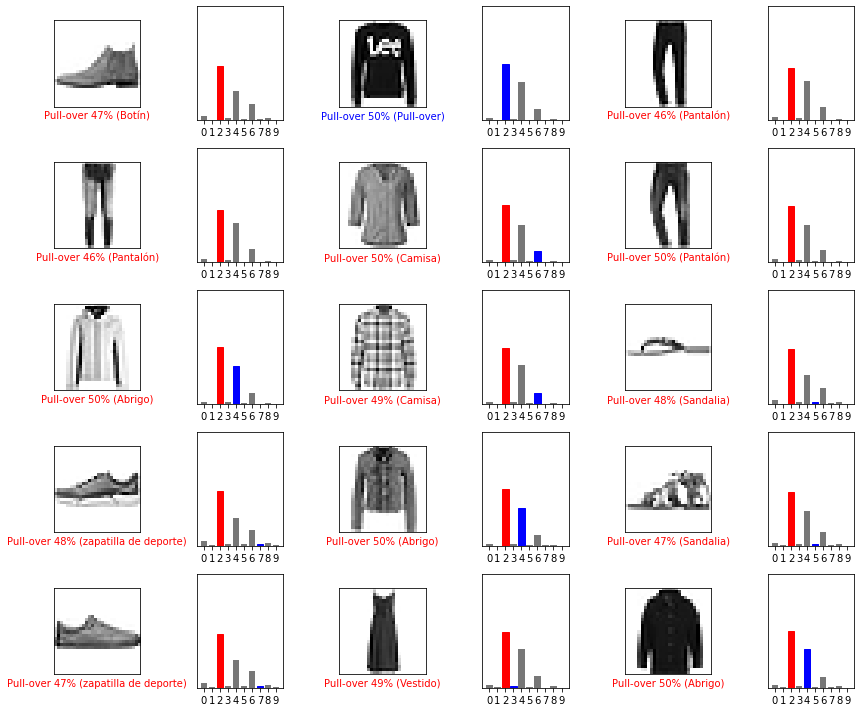

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  graficar_img(i, predicion[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  graficar_valores(i, predicion[i], test_labels)
plt.tight_layout()
plt.show()